# Wine Linear Regression

We will discuss **Simple Linear Regression** and **Multiple Linear Regression** using the wine dataset

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [4]:
wine_data = pd.read_csv("../input/wine.csv")
wine_data.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


In [5]:
wine_data_test = pd.read_csv("../input/wine_test.csv")
wine_data_test.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


# Simple Linear Regression

AGST is the Average Growing season Temperature

In [6]:
features = ['AGST']

In [7]:
from sklearn import metrics
from sklearn import linear_model

In [8]:
model = linear_model.LinearRegression()

In [10]:
model.fit(wine_data[features],wine_data['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
model.coef_

array([0.63509431])

In [11]:
model.intercept_

-3.4177613134854603

In [12]:
predictions = model.predict(wine_data[features])

# Root Mean Square Error for Train Set

In [40]:
# Sum of Square Errors
SSE = ((predictions -wine_data['Price'])**2).sum()

In [41]:
len(predictions)

25

## Loss Function

In [42]:
# Mean Square Error
MSE = SSE /len(predictions)

## Metric

In [43]:
# Root Mean Square Error
RMSE = np.sqrt(MSE)
RMSE

0.4789519870308553

In [44]:
np.sqrt(metrics.mean_squared_error(wine_data['Price'],predictions))

0.4789519870308553

## Test Predictions

In [19]:
predictions_test = model.predict(wine_data_test[features])

**Root Mean Square Error for Test Set**

In [21]:
np.sqrt(metrics.mean_squared_error(wine_data_test['Price'],predictions_test))

0.18888828680999115

# Correlation

In [22]:
def draw_plot(fig_size_x = 15,
              fig_size_y = 10,
              tick_params_labelsize = 14,
             xlabel_name_fontsize = 20,
             ylabel_name_fontsize = 20,
             title_name_fontsize = 20):
    
    #get current figure 
    fig=plt.gcf()
    
    #set the size of the figure
    fig.set_size_inches(fig_size_x,fig_size_y)

    #get axes of the current figure 
    ax =  fig.gca()

    # set the label size of the ticks of the axes
    ax.tick_params(labelsize=tick_params_labelsize)

    # set the label size of the x axis
    ax.set_xlabel(xlabel_name,fontsize = xlabel_name_fontsize)

    # set the label size of the y axis
    ax.set_ylabel(ylabel_name,fontsize = ylabel_name_fontsize)

     # set the title of the plot
    ax.set_title(title_name,fontsize = title_name_fontsize)

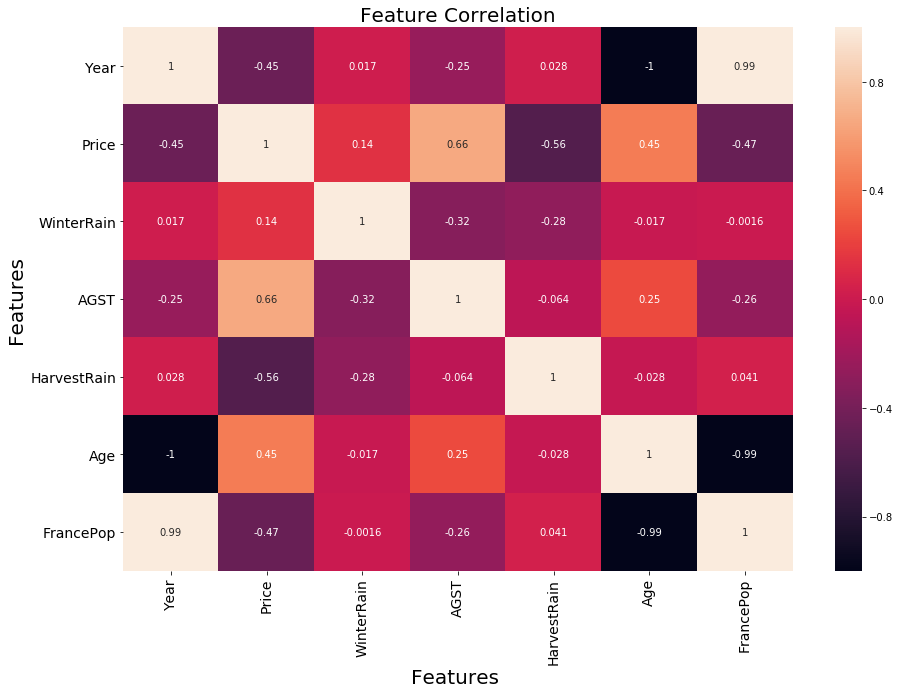

In [23]:
sns.heatmap(wine_data.corr(),annot=True)

title_name = "Feature Correlation"
xlabel_name = "Features "
ylabel_name = "Features"

draw_plot()

D:\Applications\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


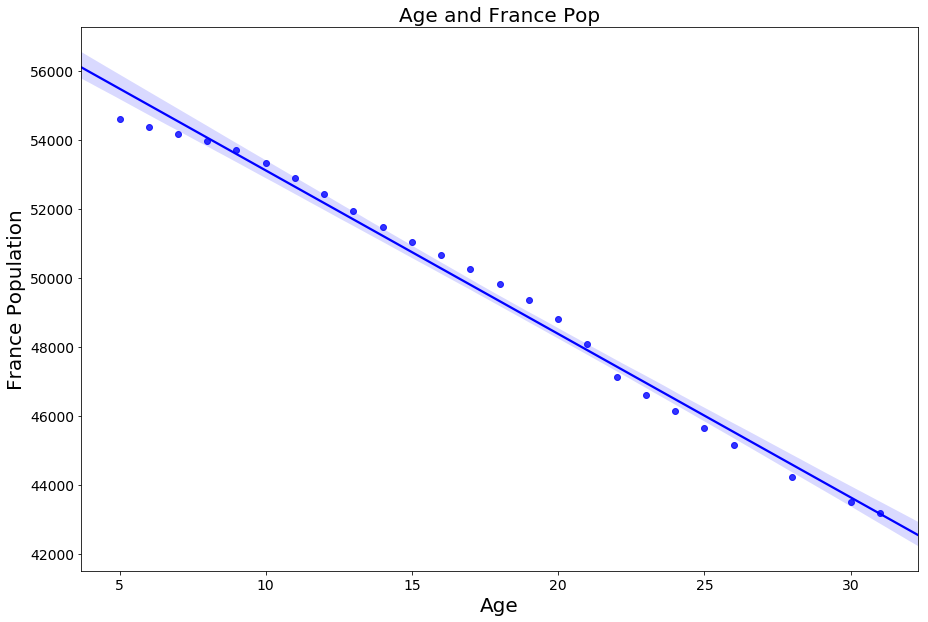

In [24]:
sns.regplot( x= 'Age', y = 'FrancePop' , color = 'blue', data = wine_data)

title_name = "Age and France Pop"
xlabel_name = "Age"
ylabel_name = "France Population"

draw_plot()

# Multiple Linear Regression

This uses the features `AGST , Harvest Rain`

In [25]:
features = ['AGST','HarvestRain']

model.fit(wine_data[features],wine_data['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
print(model.coef_ , model.intercept_)

[ 0.60261691 -0.00457006] -2.202653600949949


In [27]:
predictions_test = model.predict(wine_data_test[features])

In [29]:
np.sqrt(metrics.mean_squared_error(wine_data_test['Price'],predictions_test))

0.4269395052289169

# Multiple Linear Regression 2

This uses the features `AGST , Harvest Rain, Age`

In [30]:
features = ['AGST','HarvestRain','Age']

model.fit(wine_data[features],wine_data['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
print(model.coef_ , model.intercept_)

[ 0.5322922  -0.00453859  0.02508754] -1.4778196330524445


In [32]:
predictions_test = model.predict(wine_data_test[features])

In [34]:
np.sqrt(metrics.mean_squared_error(wine_data_test['Price'],predictions_test))

0.28011593759133363

# Multiple Linear Regression 3

This uses the features `AGST , Harvest Rain, Age, WinterRain`

In [35]:
features = ['AGST','HarvestRain','Age','WinterRain']

model.fit(wine_data[features],wine_data['Price'])

print(model.coef_ , model.intercept_)

[ 0.60720935 -0.00397153  0.02393083  0.00107551] -3.4299801869287183


In [36]:
predictions_test = model.predict(wine_data_test[features])

In [37]:
np.sqrt(metrics.mean_squared_error(wine_data_test['Price'],predictions_test))

0.18609514836196722

# Multiple Linear Regression 4

This uses the features `AGST , Harvest Rain, Age, WinterRain , FrancePop`

In [38]:
features = ['AGST','HarvestRain','Age','WinterRain','FrancePop']

model.fit(wine_data[features],wine_data['Price'])

print(model.coef_ , model.intercept_)

[ 6.01223884e-01 -3.95812450e-03  5.84748489e-04  1.04250681e-03
 -4.95273038e-05] -0.4503988643947512


In [39]:
predictions_test = model.predict(wine_data_test[features])

In [35]:
np.sqrt(metrics.mean_squared_error(wine_data_test['Price'],predictions_test))

0.20247428671658974